In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import pandas_profiling as pdp
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [2]:
# https://sci2s.ugr.es/keel/dataset.php?cod=52
df = pd.read_csv('./datasets/abalone.csv')
df.shape

(4174, 9)

## Preprocessing
### create missing value data

In [3]:
# create NaN data
num_nan = 10
missing_x = np.random.randint(0, df.shape[0], (num_nan, 1))
missing_y = np.random.randint(0, df.shape[1], (num_nan, 1))

for i, j in zip(missing_x, missing_y):
    df.iloc[i, j] = np.nan

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Handling Missing Values

In [5]:
# extract NaN data
df[df.isnull().any(axis=1)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
1348,NaN,0.605,0.485,0.165,0.9515,0.4535,0.1930,0.2765,11
1524,F,0.620,0.480,0.175,NaN,0.4640,0.2225,0.3000,9
1548,F,0.645,0.480,0.190,1.3710,NaN,0.2905,0.3500,12
1683,I,0.530,0.430,0.140,0.6770,0.2980,NaN,0.2300,8
1798,I,0.425,0.315,0.095,0.3675,0.1865,0.0675,NaN,7
2156,NaN,0.440,0.355,0.165,0.4350,0.1590,0.1050,0.1400,16
2894,NaN,0.320,0.250,0.080,0.1565,0.0570,0.0340,0.0600,9
3057,M,0.565,0.465,NaN,1.1285,0.3770,0.3525,0.3300,16
3572,I,NaN,0.295,0.095,0.2520,0.1105,0.0575,0.0660,6
4034,M,0.665,0.515,0.190,NaN,0.8310,0.3575,0.3710,11


In [6]:
# Delete or replace missing value
df.dropna(inplace=True) # delete
# df.fillna(df.mean()) # fill NaN
df.shape

(4164, 9)

### Encoding categorical values

In [7]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [8]:
# One-Hot encoding
X = pd.get_dummies(X)

In [9]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


## EDA

In [10]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
count,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000
mean,0.524038,0.407921,0.139512,0.828836,0.359353,0.180614,0.238893,0.313160,0.320845,0.365994
std,0.120051,0.099208,0.041825,0.490096,0.221723,0.109556,0.139193,0.463835,0.466858,0.481766
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.442500,0.186500,0.093500,0.130000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.234000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153250,0.502000,0.252625,0.328625,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000


In [11]:
print(X.shape)
print(Counter(y))

(4164, 10)
Counter({9: 687, 10: 634, 8: 566, 11: 485, 7: 389, 12: 265, 6: 258, 13: 203, 14: 126, 5: 115, 15: 103, 16: 65, 17: 58, 4: 57, 18: 42, 19: 32, 20: 26, 3: 15, 21: 14, 23: 9, 22: 6, 27: 2, 24: 2, 1: 1, 26: 1, 29: 1, 2: 1, 25: 1})


In [12]:
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.target import ClassBalance

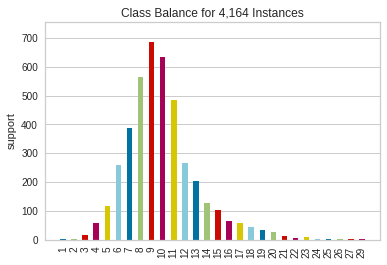

In [13]:
visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

/home/yura/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


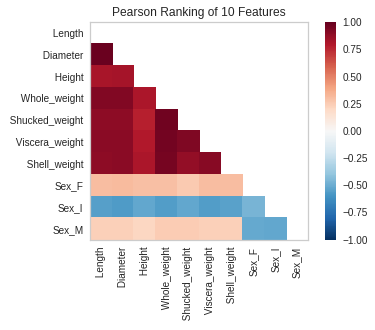

In [14]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=X.columns, algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

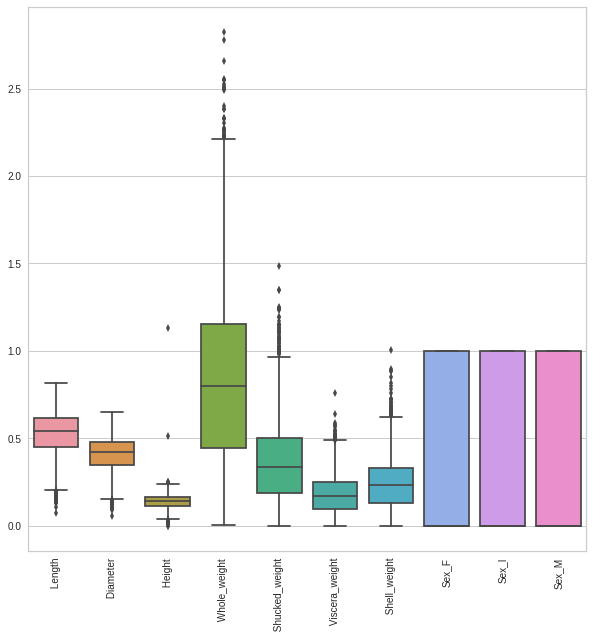

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)

In [18]:
# pandas_profiling
profile = pdp.ProfileReport(df)
profile.to_file(outputfile="output.html")
#profile

## Learning

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [22]:
# learning
kernel = ['linear', 'rbf', 'poly']
clf = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf.append(svm.fit(X_train, y_train))

## Evaluate

In [23]:
from sklearn import metrics

In [24]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')  
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [25]:
result = []

for i in range(len(clf)):
    y_pred = clf[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [26]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,Precision,Recall,Acc,F-score
0,linear,0.258,0.258,0.258,0.258
1,rbf,0.274,0.274,0.274,0.274
2,poly,0.264,0.264,0.264,0.264


In [27]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt

,Kernel,Metrics,values
0,linear,Precision,0.257503
1,rbf,Precision,0.274310
2,poly,Precision,0.263505
3,linear,Recall,0.257503
4,rbf,Recall,0.274310
5,poly,Recall,0.263505
6,linear,Acc,0.257503
7,rbf,Acc,0.274310
8,poly,Acc,0.263505
9,linear,F-score,0.257503


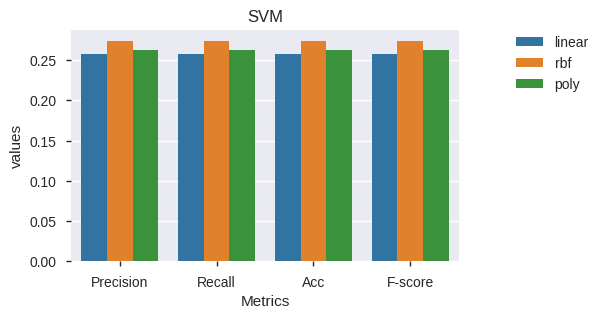

In [36]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)